# Deep-learning and convolutional neural networks (CNN)

In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

plt.style.use("seaborn-v0_8-darkgrid")

In [2]:
from keras.preprocessing.image import ImageDataGenerator

In [13]:
data_path = 'imagedata'
train_dir = os.path.join(data_path, 'train')
validation_dir = os.path.join(data_path, 'validation')
test_dir = os.path.join(data_path, 'test')
img_width, img_height = 32, 32
input_shape = (img_width, img_height, 3)
batch_size = 32
num_epochs = 10

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

validation_generator = val_datagen.flow_from_directory(
    validation_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True
)

train_generator.class_indices

Found 20000 images belonging to 2 classes.
Found 4000 images belonging to 2 classes.


{'elliptical': 0, 'spiral': 1}

In [6]:
def plot_images(generator, n=1):
    num_images = len(generator.filenames)/ int(n)
    num_cols = int(np.ceil(np.sqrt(num_images)))
    num_rows = int(np.ceil(num_images / num_cols))
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(10, 10))
    for i in range(num_rows):
        for j in range(num_cols):
            if i*num_cols + j >= num_images:
                break
            img_path = os.path.join(generator.directory, generator.filenames[i*num_cols+j])
            img = keras.preprocessing.image.load_img(img_path, target_size=(img_width, img_height))
            axes[i, j].imshow(img)
            axes[i, j].set_title(f"{generator.classes[i*num_cols+j]}")
            axes[i, j].axis("off")
    plt.show()


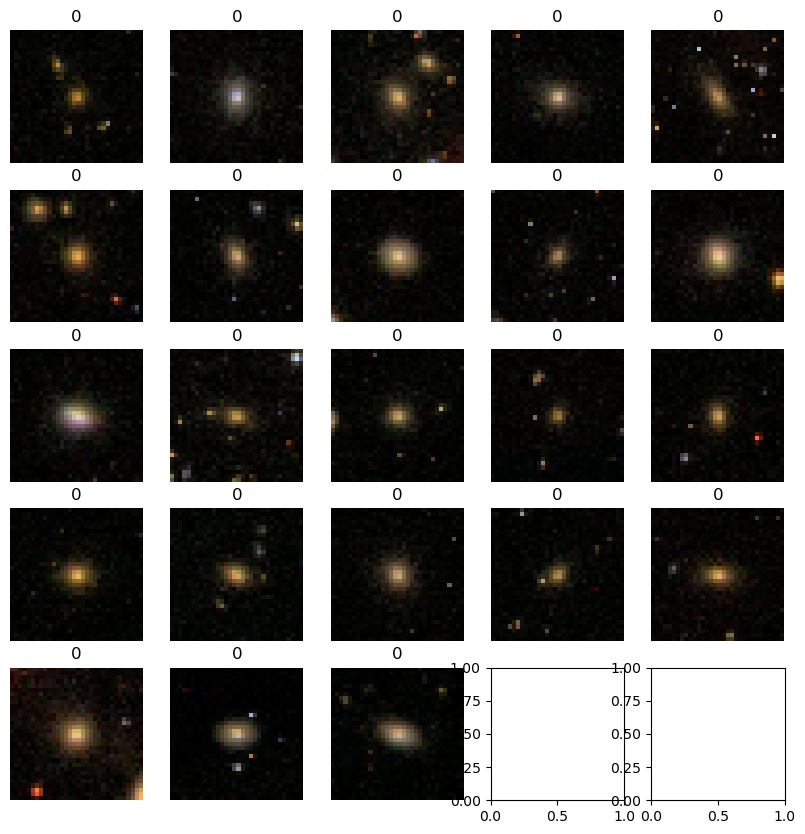

In [9]:
plot_images(train_generator, n=900)

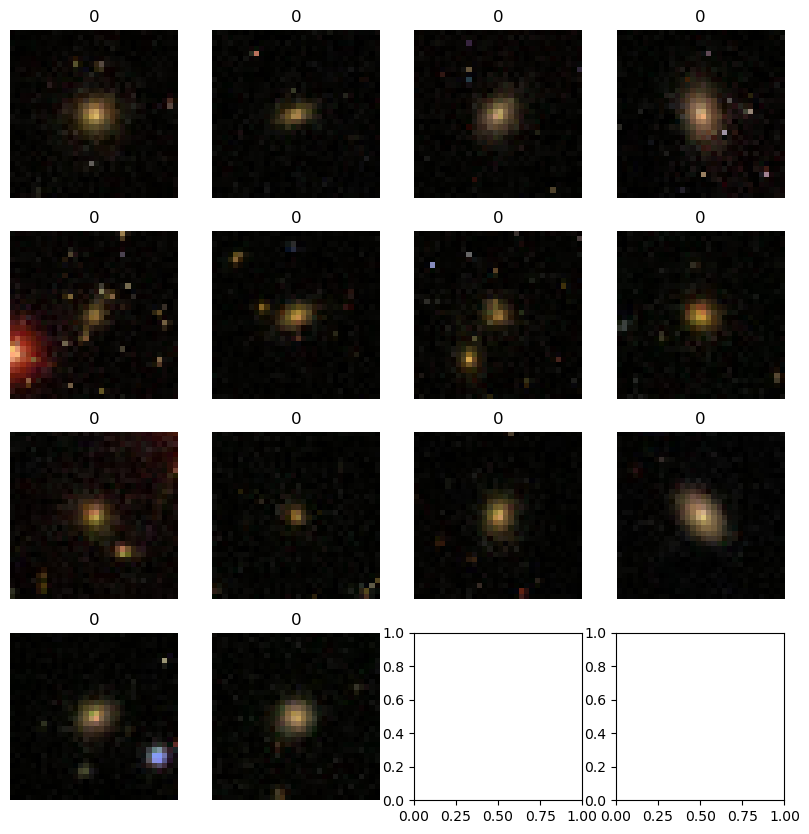

In [10]:
plot_images(validation_generator, 300)

In [11]:
model = keras.Sequential(
    [
        layers.Conv2D(32, kernel_size=(3, 3), activation="relu", input_shape=input_shape),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(64, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Flatten(),
        layers.Dense(2, activation="softmax"),
    ]
)


In [12]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

# Entrainement du modèle
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=validation_generator)

Epoch 1/10


2023-04-05 21:09:12.123369: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


625/625 [==============================] - 35s 56ms/step - loss: 0.2401 - accuracy: 0.9036 - val_loss: 0.1594 - val_accuracy: 0.9398
Epoch 2/10
625/625 [==============================] - 35s 55ms/step - loss: 0.1485 - accuracy: 0.9445 - val_loss: 0.1229 - val_accuracy: 0.9530
Epoch 3/10
625/625 [==============================] - 35s 55ms/step - loss: 0.1339 - accuracy: 0.9509 - val_loss: 0.1108 - val_accuracy: 0.9617
Epoch 4/10
625/625 [==============================] - 35s 56ms/step - loss: 0.1246 - accuracy: 0.9530 - val_loss: 0.1065 - val_accuracy: 0.9605
Epoch 5/10
625/625 [==============================] - 35s 55ms/step - loss: 0.1173 - accuracy: 0.9568 - val_loss: 0.0998 - val_accuracy: 0.9632
Epoch 6/10
625/625 [==============================] - 35s 55ms/step - loss: 0.1110 - accuracy: 0.9593 - val_loss: 0.0989 - val_accuracy: 0.9620
Epoch 7/10
625/625 [==============================] - 35s 56ms/step - loss: 0.1047 - accuracy: 0.9614 - val_loss: 0.0884 - val_accuracy: 0.9670
Epo

In [14]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(img_height, img_width),
        batch_size=batch_size,
        class_mode='categorical')

Found 10000 images belonging to 2 classes.


In [15]:
model.evaluate(test_generator)

313/313 [==============================] - 14s 44ms/step - loss: 0.0935 - accuracy: 0.9666


[0.09352701902389526, 0.9666000008583069]

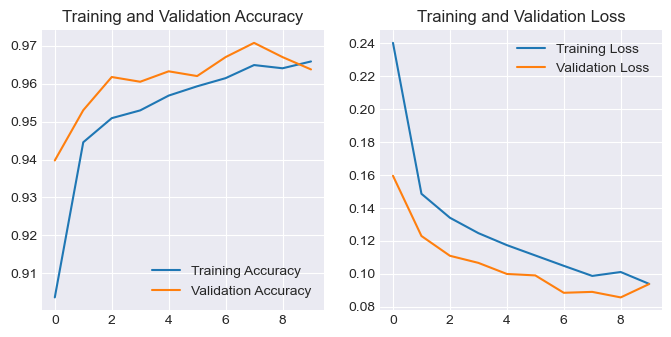

In [17]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(num_epochs)

plt.figure(figsize=(8, 8))
plt.subplot(2, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(2, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()